#LGBM & XGBM

##Objective:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##Exploratory Data Analysis (EDA):
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.


### Training Data

In [2]:
titanic_train = pd.read_csv('/content/Titanic_train.csv')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_train.info()
# There are 891 entries and 12 columns
# Only 'Age','Cabin' and 'Embarked' columns has null values
# 'Name','Sex','Ticket','Cabin','Embarked' columns are of the 'object' dtype
# 'PassengerId','Survived','Pclass','SibSp','Parch' columns are of the 'int64' dtype
# 'Age' and 'Fare' columns are of the 'float64' dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_train.describe()
# Some of the columns has outliers present
# 'SibSp','Parch' and 'survived' columns has very less variance

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_train.duplicated().sum()
# It has no duplicate data

0

In [6]:
titanic_train.isnull().sum()
# 'Age' has 177 null values
# 'Cabin' has 687 null values
# Embarked has 2 null values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

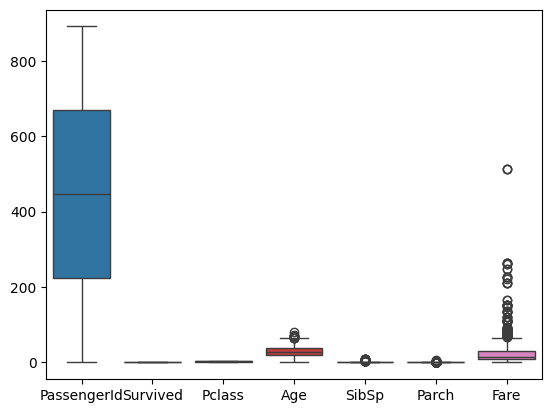

In [7]:
sns.boxplot(titanic_train)

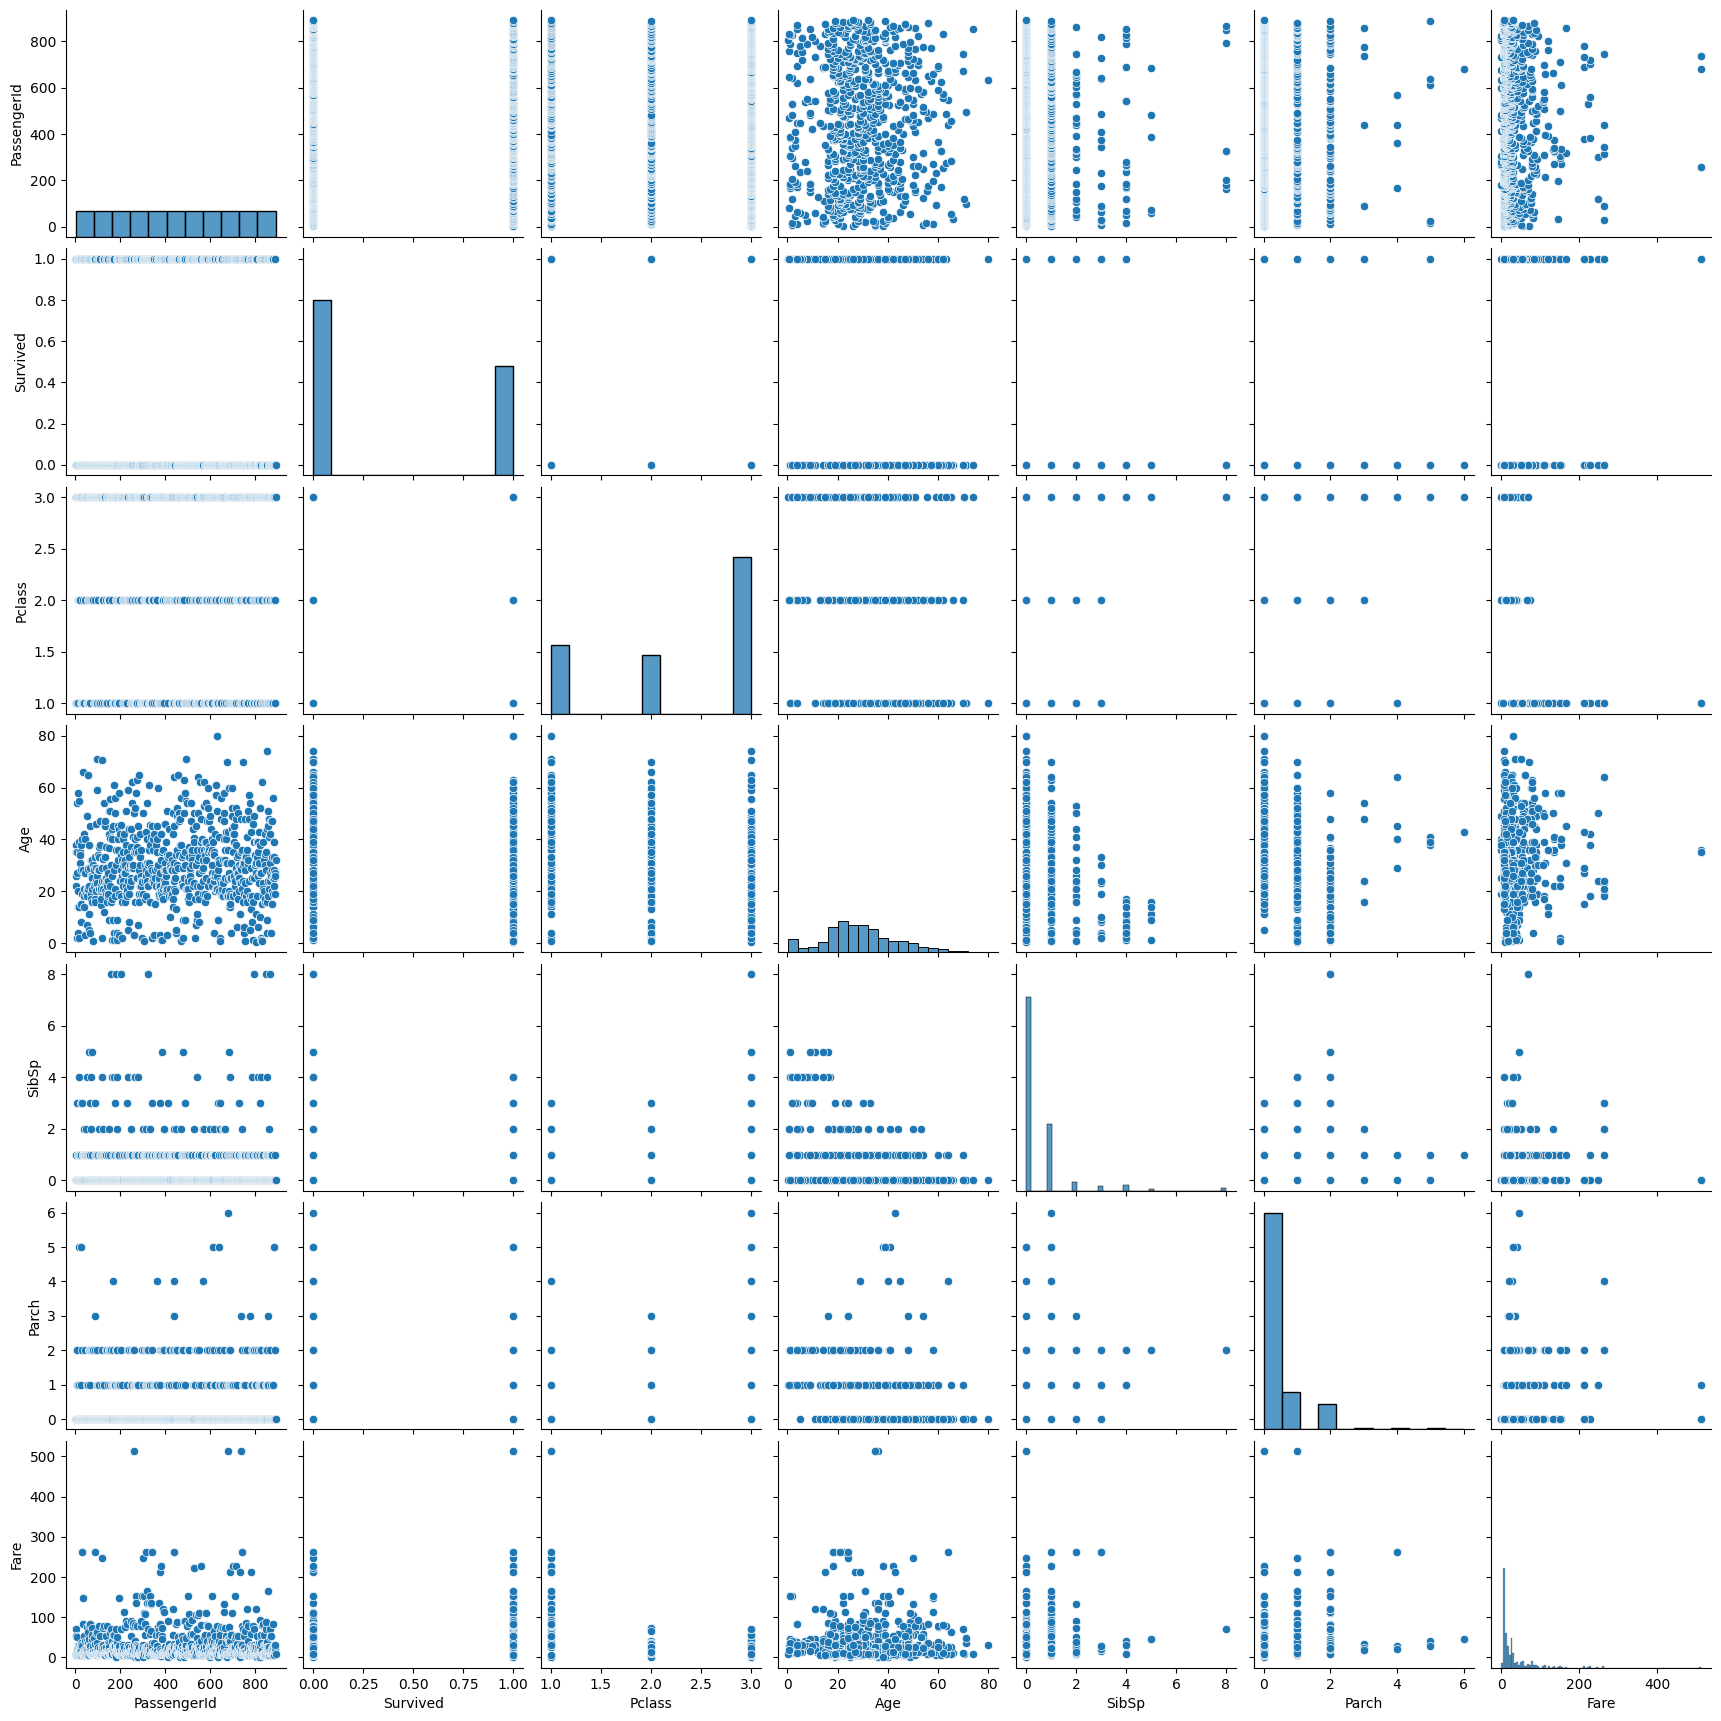

In [8]:
sns.pairplot(titanic_train)

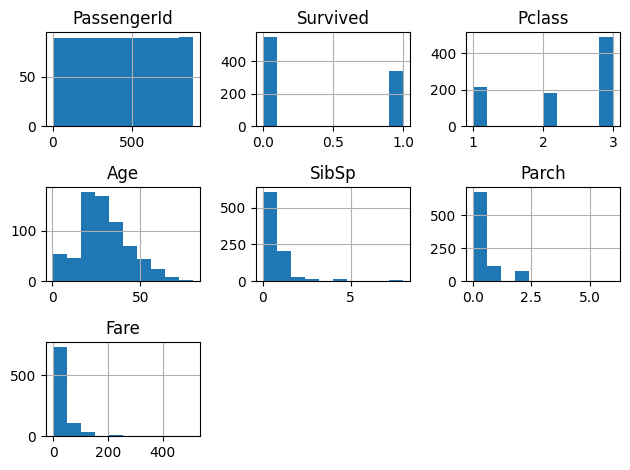

In [9]:
titanic_train.hist()
plt.tight_layout()

In [10]:
titanic_train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

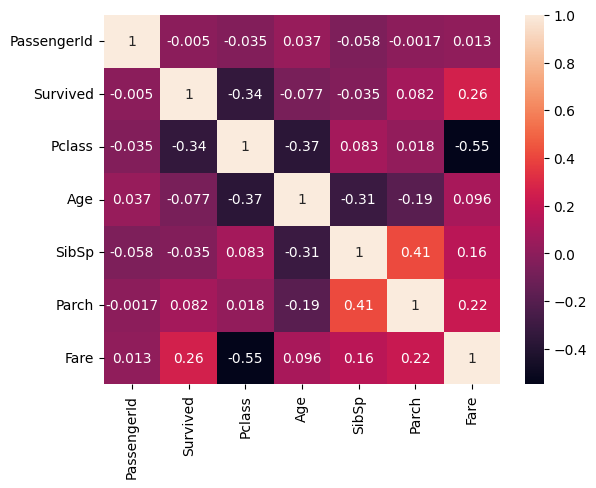

In [11]:
sns.heatmap(titanic_train.corr(numeric_only=True), annot=True)
# 'Pclass' and 'Fare' has moderate negative correlation
# 'SibSp' and 'Parch' has moderate positive correlation

### Testing Data

In [12]:
titanic_test = pd.read_csv('/content/Titanic_test.csv')
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [13]:
titanic_test.info()
# There are 418 entries with 11 columns
# 'Age','Fare'and 'Cabin' column has null values present
# 'Name','Sex','Ticket','Cabin','Embarked' columns are of the 'object' dtype
# 'PassengerId','Pclass','SibSp','Parch' columns are of the 'int64' dtype
# 'Age' and 'Fare' columns are of the 'float64' dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
titanic_test.describe()
# There are some outliers present in some columns

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
titanic_test.duplicated().sum()
# No duplicate values are present

0

In [16]:
titanic_test.isna().sum()
# 'Age' column has 86 null values
# 'Fare' column has 1 null value
# 'Cabin' column has 327 null values

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


<Axes: >

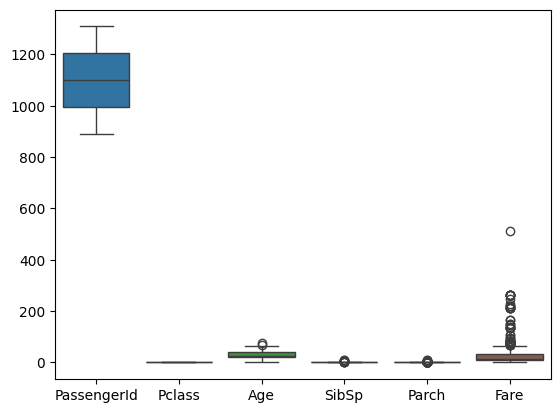

In [17]:
sns.boxplot(titanic_test)

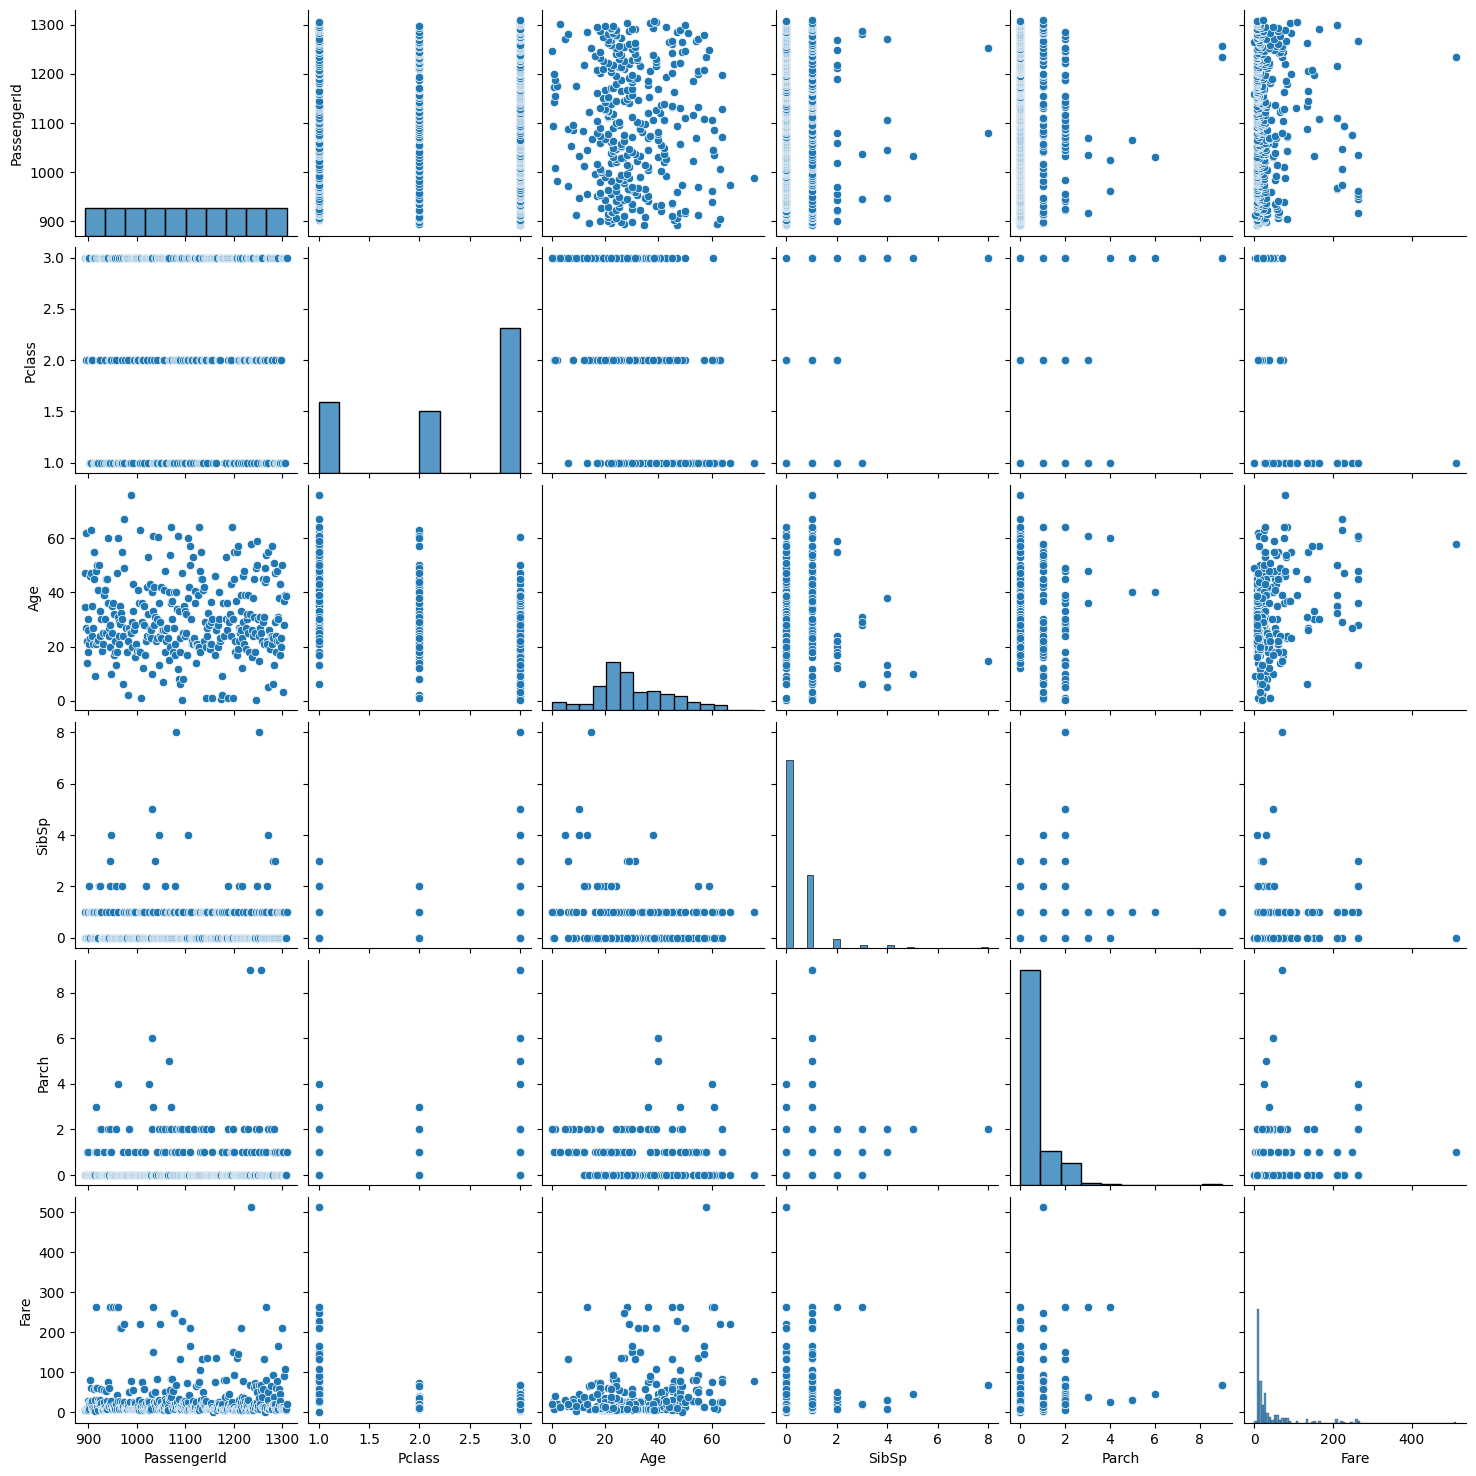

In [18]:
sns.pairplot(titanic_test)

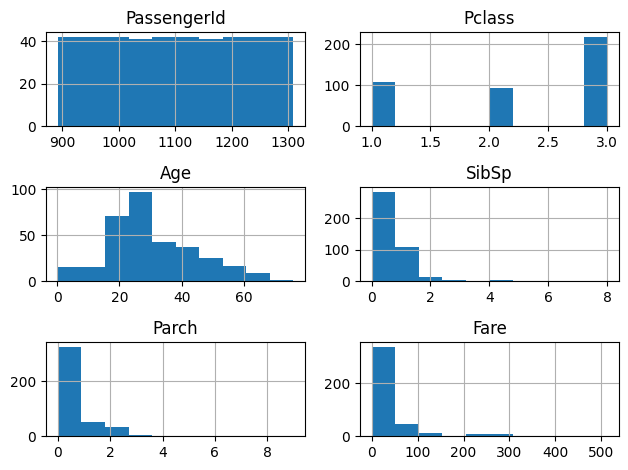

In [19]:
titanic_test.hist()
plt.tight_layout()

In [20]:
titanic_test.corr(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


<Axes: >

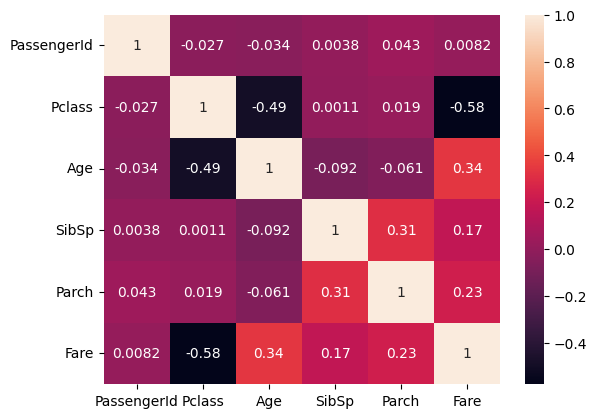

In [21]:
sns.heatmap(titanic_test.corr(numeric_only=True), annot=True)
# 'Pclass' and 'Age' has moderate negative correlation
# 'Pclass' and 'Fare' also has moderate negative correlation

##Data Preprocessing:
1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding.
3.	If needed you can apply more preprocessing methods on the given dataset.


###Training data

In [22]:
for j in titanic_train.columns:
    print(j+" : ", (titanic_train.isna().sum().loc[j,]/len(titanic_train)*100))
# 0 to 5% missing values -> Remove the entries
# 6 to 45% missing values -> Impute the values either by median or by mean
# above 50% missing values -> Drop the entire column

PassengerId :  0.0
Survived :  0.0
Pclass :  0.0
Name :  0.0
Sex :  0.0
Age :  19.865319865319865
SibSp :  0.0
Parch :  0.0
Ticket :  0.0
Fare :  0.0
Cabin :  77.10437710437711
Embarked :  0.22446689113355783


In [23]:
#'Embarked' column has 2% missing values, so lets remove those entries
titanic_train.dropna(subset=['Embarked'], inplace=True)
titanic_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [24]:
# 'Cabin' has 77% missing values hence we drop the column
titanic_train.drop(columns=['Cabin'], inplace=True)
titanic_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: ylabel='Age'>

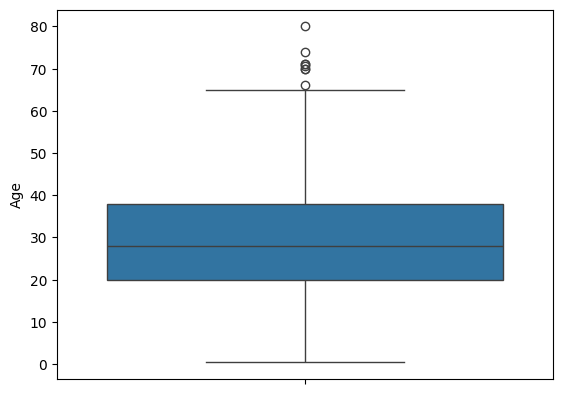

In [25]:
# 'Age' has 19% missing values, hence we need to impute it
# Lets check if the 'Age' column has outliers or not
# If it has outliers then we need to impute the values with median and if not then by mean
sns.boxplot(titanic_train['Age'])
# So it has outliers present, hence we impute the values with median

In [26]:
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].median())
titanic_train.isna().sum()
# All the missing values have been handled

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [27]:
t_train = titanic_train.loc[:,['Pclass','Age','SibSp','Parch','Fare']]
t_train

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,28.0,1,2,23.4500
889,1,26.0,0,0,30.0000


In [28]:
t_train['Sex'] = titanic_train['Sex']
t_train['Embarked'] = titanic_train['Embarked']
t_train

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,22.0,1,0,7.2500,male,S
1,1,38.0,1,0,71.2833,female,C
2,3,26.0,0,0,7.9250,female,S
3,1,35.0,1,0,53.1000,female,S
4,3,35.0,0,0,8.0500,male,S
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,male,S
887,1,19.0,0,0,30.0000,female,S
888,3,28.0,1,2,23.4500,female,S
889,1,26.0,0,0,30.0000,male,C


In [29]:
t_train = pd.get_dummies(t_train, columns=['Sex','Embarked'], dtype='int')
t_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [30]:
t_train['Survived'] = titanic_train['Survived']
t_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,22.0,1,0,7.2500,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,1,0,0,0,1,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1
4,3,35.0,0,0,8.0500,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1,0
887,1,19.0,0,0,30.0000,1,0,0,0,1,1
888,3,28.0,1,2,23.4500,1,0,0,0,1,0
889,1,26.0,0,0,30.0000,0,1,1,0,0,1


In Ensemble Methods Feature scaling is not required as distance calculation is not involved

###Testing Data

In [31]:
for j in titanic_test.columns:
    print(j+" : ", (titanic_test.isna().sum().loc[j,]/len(titanic_test)*100))
# 0 to 5% missing values -> Remove the entries
# 6 to 45% missing values -> Impute the values either by median or by mean
# above 50% missing values -> Drop the entire column

PassengerId :  0.0
Pclass :  0.0
Name :  0.0
Sex :  0.0
Age :  20.574162679425836
SibSp :  0.0
Parch :  0.0
Ticket :  0.0
Fare :  0.23923444976076555
Cabin :  78.22966507177034
Embarked :  0.0


In [32]:
# 'Fare' column has 2% missing values, hence remove the entries
titanic_test.dropna(subset=['Fare'], inplace=True)
titanic_test.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,326


In [33]:
# 'Cabin' column has 78% of missing values, hence we drop the column
titanic_test.drop(columns=['Cabin'], inplace=True)
titanic_test.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


<Axes: ylabel='Age'>

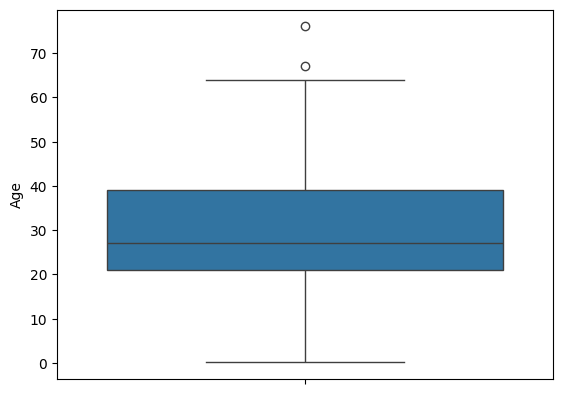

In [34]:
# 'Age' has 20% missing values, hence we need to impute it
# Lets check if the 'Age' column has outliers or not
# If it has outliers then we need to impute the values with median and if not then by mean
sns.boxplot(titanic_test['Age'])
# So it has outliers present, hence we impute the values with median

In [35]:
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].median())
titanic_test.isna().sum()
# All the missing values have been handled

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [36]:
t_test = titanic_test.loc[:,['Pclass','Age','SibSp','Parch','Fare']]
t_test

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875
...,...,...,...,...,...
413,3,27.0,0,0,8.0500
414,1,39.0,0,0,108.9000
415,3,38.5,0,0,7.2500
416,3,27.0,0,0,8.0500


In [37]:
t_test['Sex'] = titanic_test['Sex']
t_test['Embarked'] = titanic_test['Embarked']
t_test

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,34.5,0,0,7.8292,male,Q
1,3,47.0,1,0,7.0000,female,S
2,2,62.0,0,0,9.6875,male,Q
3,3,27.0,0,0,8.6625,male,S
4,3,22.0,1,1,12.2875,female,S
...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,male,S
414,1,39.0,0,0,108.9000,female,C
415,3,38.5,0,0,7.2500,male,S
416,3,27.0,0,0,8.0500,male,S


In [38]:
t_test = pd.get_dummies(t_test, columns=['Sex','Embarked'], dtype='int')
t_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,27.0,0,0,8.0500,0,1,0,0,1


##Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

!pip install xgboost
from xgboost import XGBClassifier

import lightgbm as lgb

In [40]:
X_train = t_train.iloc[:,:-1]
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [41]:
Y_train = t_train['Survived']
Y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [42]:
def prediction(model):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(t_test)
    print('Training Accuracy: ', model.score(X_train, Y_train))

In [43]:
prediction(DecisionTreeClassifier())

Training Accuracy:  0.9797525309336333


In [44]:
prediction(GradientBoostingClassifier())

Training Accuracy:  0.8998875140607424


In [45]:
prediction(BaggingClassifier())

Training Accuracy:  0.9606299212598425


In [46]:
prediction(XGBClassifier())

Training Accuracy:  0.9617547806524185


####Hyperparameter Tuning for XGB

In [47]:
params = {
    'n_estimators':[90,110,150],
    'learning_rate':[0.5,0.7,1],
    'lambda':[1,2,3],
    'max_depth':[3,7,11]
}

In [48]:
grid = GridSearchCV(XGBClassifier(), param_grid=params, verbose=1)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'lambda': [1, 2, 3], 'learning_rate': [0.5, 0.7, 1],
                         'max_depth': [3, 7, 11],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [49]:
grid.best_params_

{'lambda': 1, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 90}

In [50]:
XGBmodel = XGBClassifier(reg_lambda=1, learning_rate=0.5, max_depth=3, n_estimators=90)
XGBmodel.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=90, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [51]:
prediction(XGBClassifier(reg_lambda=1, learning_rate=0.5, max_depth=3, n_estimators=90))

Training Accuracy:  0.9291338582677166


####LGBM

In [52]:
params = {
        'objective': 'binary',
        'boosting': 'dart',
        'seed': 3,
        'learning_rate': 0.04,
        'n_jobs': -1
        }
lgb_train = lgb.Dataset(X_train, Y_train)
LGBmodel = lgb.train(params = params,
                train_set = lgb_train,)

[LightGBM] [Info] Number of positive: 340, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 889, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382452 -> initscore=-0.479153
[LightGBM] [Info] Start training from score -0.479153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [53]:
preds = LGBmodel.predict(t_test)
preds

array([0.14910812, 0.46255463, 0.24151585, 0.32346237, 0.42831296,
       0.27645814, 0.61105588, 0.25095488, 0.6959204 , 0.14452343,
       0.1902792 , 0.27344513, 0.86271492, 0.14474842, 0.86494299,
       0.76504064, 0.20068382, 0.26785045, 0.49904794, 0.61105588,
       0.28234368, 0.54424412, 0.86494299, 0.457229  , 0.79122554,
       0.12003064, 0.86271492, 0.26785045, 0.53732148, 0.31153082,
       0.14474842, 0.19446627, 0.50495827, 0.57124806, 0.49705988,
       0.25908915, 0.40036849, 0.40373063, 0.2062876 , 0.44136793,
       0.21684834, 0.57895854, 0.15111779, 0.84246726, 0.86494299,
       0.25009782, 0.47446572, 0.28307217, 0.86494299, 0.50495827,
       0.5538763 , 0.34673181, 0.80875459, 0.79122554, 0.35230486,
       0.20748987, 0.12042278, 0.25115542, 0.15604268, 0.79122554,
       0.16823113, 0.2808991 , 0.18410661, 0.6959204 , 0.60944997,
       0.75068035, 0.6959204 , 0.30251076, 0.53289225, 0.79122554,
       0.6959204 , 0.14146077, 0.42115083, 0.49254375, 0.79122

In [54]:
t_LGB = t_test.copy()
t_LGB['Pred_Survived'] = np.round(preds).astype(int)
t_LGB

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pred_Survived
0,3,34.5,0,0,7.8292,0,1,0,1,0,0
1,3,47.0,1,0,7.0000,1,0,0,0,1,0
2,2,62.0,0,0,9.6875,0,1,0,1,0,0
3,3,27.0,0,0,8.6625,0,1,0,0,1,0
4,3,22.0,1,1,12.2875,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,0,1,0,0,1,0
414,1,39.0,0,0,108.9000,1,0,1,0,0,1
415,3,38.5,0,0,7.2500,0,1,0,0,1,0
416,3,27.0,0,0,8.0500,0,1,0,0,1,0


##Comparative Analysis:
1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
Y_pred_XGBM = XGBmodel.predict(X_train)
Y_pred_LGBM = np.round(LGBmodel.predict(X_train)).astype(int)

####Accuracy

In [56]:
print('XGBM: ', accuracy_score(y_true=Y_train, y_pred=Y_pred_XGBM ))
print('LGBM: ', accuracy_score(y_true=Y_train, y_pred=Y_pred_LGBM ))
# Both of the model gives a good accuracy

XGBM:  0.9291338582677166
LGBM:  0.8616422947131609


####Precision

In [57]:
print('XGBM: ', precision_score(y_true=Y_train, y_pred=Y_pred_XGBM ))
print('LGBM: ', precision_score(y_true=Y_train, y_pred=Y_pred_LGBM ))
# Both of the model gives a good Precision

XGBM:  0.9261538461538461
LGBM:  0.8754325259515571


####Recall

In [58]:
print('XGBM: ', recall_score(y_true=Y_train, y_pred=Y_pred_XGBM ))
print('LGBM: ', recall_score(y_true=Y_train, y_pred=Y_pred_LGBM ))
# Both of the model gives a good recall

XGBM:  0.8852941176470588
LGBM:  0.7441176470588236


Difference between XGBM and LGBM

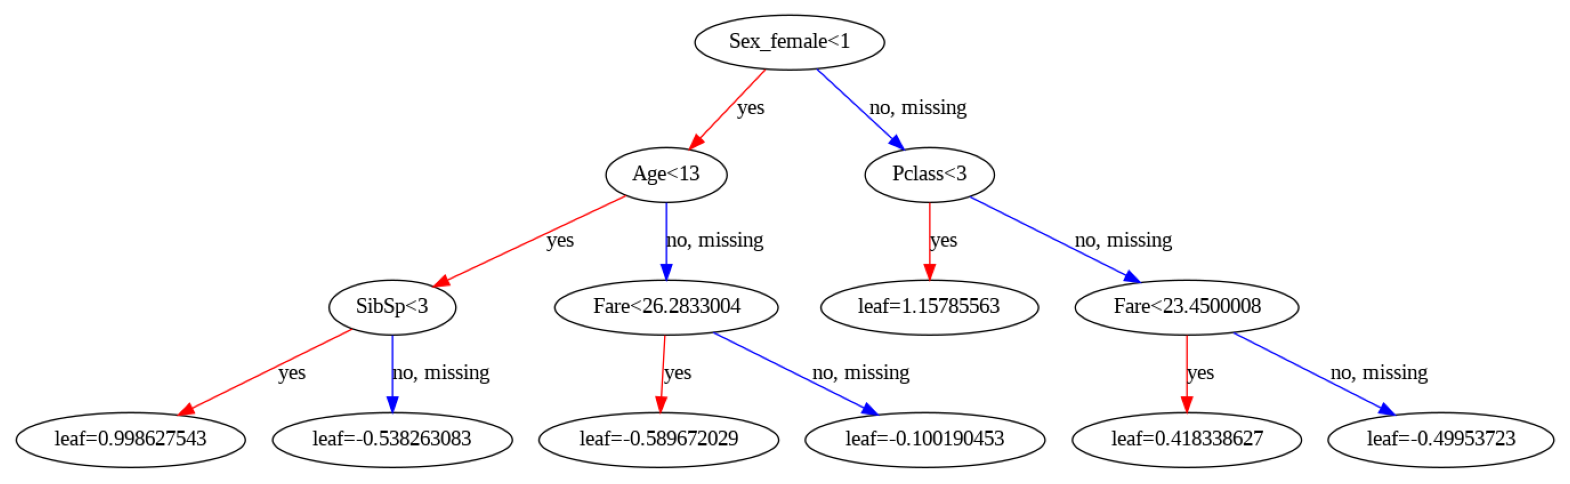

In [59]:
plt.rcParams['figure.figsize']=(20,10)
from xgboost import plot_tree
plot_tree(XGBmodel)
plt.show()

Here, we can see that XGBM is having a level wise tree growth

<Axes: >

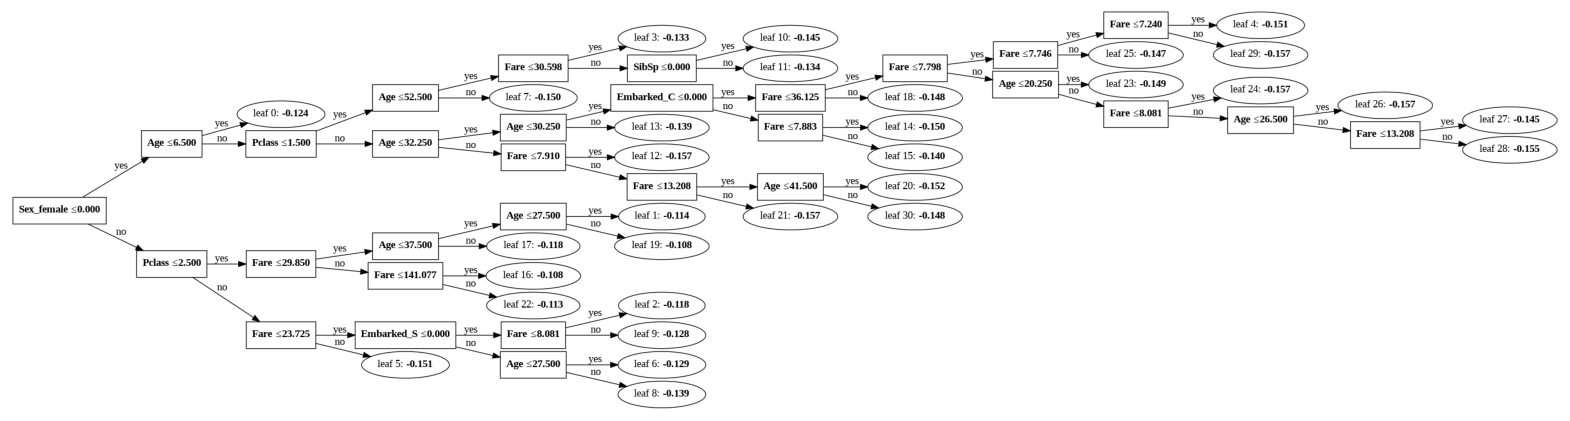

In [60]:
lgb.plot_tree(LGBmodel, tree_index=0)

<Axes: >

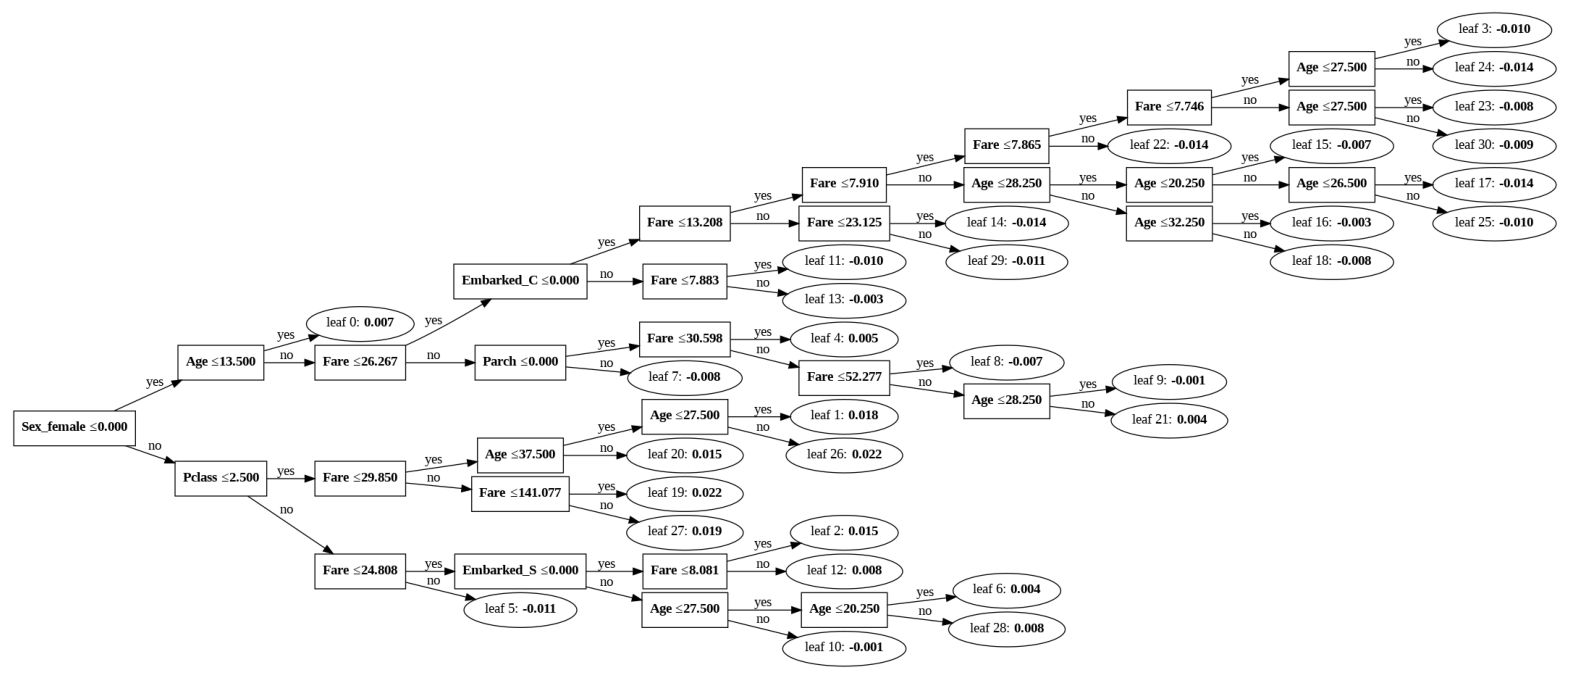

In [61]:
lgb.plot_tree(LGBmodel, tree_index=1)

On the other hand LGBM carries out leafwise growth.

####Strength and weakness of each algorithm
* LGBM requires less memory and less time to train the model as compared to XGBM. But it might lead the model to be overfit sometimes.
* XGBM is an improved version of the Gradient Boosting Algorithm. It splits level-wise rather than leaf-wise. XGBM takes more time as compared to LGBM